In [1]:
%load_ext autoreload
%autoreload 2

import cPickle, os, sys
import random
sys.path.insert(1, os.path.join(sys.path[0], '..'))

from ddlite import *

# Processing the input data

The raw data extracted from PMC is located in 'DATA_FOLDER' and already structured in json through the code explained in arabidopsis_data/pmc/README.md.
We use ddlite's parser to parse the data and dump pickles files of parsed sentences.

This section takes a significant time to run and requires the parser to be installed. Therefore, it's preferable to run it once and dump the 'sents' object in a pickle file.

In [2]:
DATA_FOLDER='arabidopsis_data/'

In [3]:
import json

In [4]:
# block to go from the dataset in json file to a dictionary object hashed by doc_id.

# name_file_to_parse='pmc/round1/output_plant'
# nb_lines=0
# nb_error_parsing=0
# with open(DATA_FOLDER+name_file_to_parse+'.json', 'rb') as json_file:
#     with open(DATA_FOLDER+name_file_to_parse + '.text', 'wb') as text_write:
#         docs={}
#         for line in json_file:
#             nb_lines+=1
#             doc_id_read=str(json.loads(line)['doc-id'].encode('utf-8').strip())
# #             try:
#             #Because this doc is too big
#             if doc_id_read=='10.1093.jxb.eru198':
#                 if random.random() <0.5:
#                     doc_id_read += '_1'
#                 else:
#                     doc_id_read += '_2'
#             if doc_id_read in docs:
#                 docs[doc_id_read] += unicode(str(json.loads(line)['content'].encode('utf-8').strip()) + '.\n', errors='ignore')
#             else:
#                 docs[doc_id_read] = unicode(str(json.loads(line)['content'].encode('utf-8').strip()) + '.\n', errors='ignore')
# #                 text_write.write(unicode(str(json.loads(line)['content'].encode('utf-8').strip()) + '.\n', errors='ignore'))
# #             except:
# #                 nb_error_parsing +=1
# #                 print "error parsing"
# print nb_lines
# print nb_error_parsing

In [5]:
#Section to parse the previous dict object 'docs' into a list of parsed sentences, ideal input for ddlite.

# pkl_f=DATA_FOLDER+'pmc/pickle/pkl_sentences'
# sents=[]
# count_loop=0
# parser_sent = SentenceParser()
# try:
#     with open(pkl_f, 'rb') as f:
#         sents = cPickle.load(f)
# except:
#     print"parsing data"
#     for doc_id_loop in docs:
#         count_loop+=1
#         print count_loop
#         for j in parser_sent.parse(docs[doc_id_loop], doc_id=doc_id_loop):
#             sents.append(j)
#     with open(pkl_f, 'w+') as f:
#         cPickle.dump(sents, f)

In [58]:
# # Brief code to merge round1 and round2 data 
# #(done for a current small amount of data and since round 1 and round2 pickles files are still small enough to be shared with git).
# #Not great, to be improved with a better management of dataset. (for instance)

with open(DATA_FOLDER+'pmc/pickle/pkl_sentences', 'rb') as f:
    sents1=cPickle.load(f)
    
with open(DATA_FOLDER+'pmc/pickle/pkl_sentences_round_2', 'rb') as f:
    sents2=cPickle.load(f)

sents_tot = sents1 + sents2


In [7]:
print len(sents_tot)
print sents_tot[0]

62655
Sentence(words=[u'PROTEIN', u'TARGETING', u'TO', u'STARCH', u'Is', u'Required', u'for', u'Localising', u'GRANULE-BOUND', u'STARCH', u'SYNTHASE', u'to', u'Starch', u'Granules', u'and', u'for', u'Normal', u'Amylose', u'Synthesis', u'in', u'Arabidopsis', u'.'], lemmas=[u'PROTEIN', u'TARGETING', u'to', u'STARCH', u'be', u'require', u'for', u'localise', u'granule-bound', u'starch', u'synthase', u'to', u'Starch', u'Granules', u'and', u'for', u'normal', u'Amylose', u'synthesis', u'in', u'Arabidopsis', u'.'], poses=[u'NNP', u'NNP', u'TO', u'NNP', u'VBZ', u'VBN', u'IN', u'VBG', u'JJ', u'NN', u'NN', u'TO', u'NNP', u'NNPS', u'CC', u'IN', u'JJ', u'NNP', u'NN', u'IN', u'NNP', u'.'], dep_parents=[2, 6, 4, 2, 6, 0, 11, 11, 11, 11, 6, 14, 14, 11, 6, 19, 19, 19, 6, 21, 19, 6], dep_labels=[u'compound', u'nsubjpass', u'case', u'nmod', u'auxpass', u'ROOT', u'case', u'amod', u'amod', u'compound', u'nmod', u'case', u'compound', u'nmod', u'cc', u'case', u'amod', u'compound', u'conj', u'case', u'nmod', 

In [9]:
# brief reduction of the total number of process to speed up the running time and the iteration process
sents=sents_tot[0:1000]
# sents=sents_tot
print len(sents)
print sents[0]

1000
Sentence(words=[u'PROTEIN', u'TARGETING', u'TO', u'STARCH', u'Is', u'Required', u'for', u'Localising', u'GRANULE-BOUND', u'STARCH', u'SYNTHASE', u'to', u'Starch', u'Granules', u'and', u'for', u'Normal', u'Amylose', u'Synthesis', u'in', u'Arabidopsis', u'.'], lemmas=[u'PROTEIN', u'TARGETING', u'to', u'STARCH', u'be', u'require', u'for', u'localise', u'granule-bound', u'starch', u'synthase', u'to', u'Starch', u'Granules', u'and', u'for', u'normal', u'Amylose', u'synthesis', u'in', u'Arabidopsis', u'.'], poses=[u'NNP', u'NNP', u'TO', u'NNP', u'VBZ', u'VBN', u'IN', u'VBG', u'JJ', u'NN', u'NN', u'TO', u'NNP', u'NNPS', u'CC', u'IN', u'JJ', u'NNP', u'NN', u'IN', u'NNP', u'.'], dep_parents=[2, 6, 4, 2, 6, 0, 11, 11, 11, 11, 6, 14, 14, 11, 6, 19, 19, 19, 6, 21, 19, 6], dep_labels=[u'compound', u'nsubjpass', u'case', u'nmod', u'auxpass', u'ROOT', u'case', u'amod', u'amod', u'compound', u'nmod', u'case', u'compound', u'nmod', u'cc', u'case', u'amod', u'compound', u'conj', u'case', u'nmod', u

# Candidate mention Extraction

Extracting candidates for relations in ddlite is done with Matcher objects. We first extract all the mentions of Genes and Phenotypes in the sentences. The dictionaries are located in the 'dicts' folder.

## Gene extraction

For the gene extraction, we use a dictionary of genes on which we remove some blacklist words.
We then need to extend it for alleles and multiple mutant. For that, we create a new class, 'ConcatDictionaryMatch', which merge several consecutive candidates as one candidate.
TODO: it needs to be extended to potentially add regular expressions.

In [10]:
genes=[]
for row_genes in [line.rstrip().split('\t') for line in open(DATA_FOLDER + '/dicts/list_genes.txt')]:
    for gene in row_genes:
        genes.append(gene)
        
#Removing blacklist_words
blacklist_words = [line.rstrip().split('\t')[1].lower() for line in open(DATA_FOLDER + '/dicts/blacklist_words.txt')][1:]
genes_filtered = [x.lower() for x in genes if x.lower() not in blacklist_words]

#Do using concat function from candidate_extractor_2 branch with a regex
#Adding alleles possibilities (only the longest match is kept anyway)
genes_with_alleles_1 = ["_ " + x + " _ - " + str(i) for x in genes_filtered for i in range(10)]
genes_with_alleles_1_bis = ["_ " + x + " _ -" + str(i) for x in genes_filtered for i in range(10)]
genes_with_alleles_2 = ["_ " + x + " _ - _ " + str(i) + " _" for x in genes_filtered for i in range(10)]
genes_with_alleles_3 = [x + " - " + str(i) for x in genes_filtered for i in range(10)]



genes_tot= genes_filtered + genes_with_alleles_1+ genes_with_alleles_1_bis + genes_with_alleles_2 + genes_with_alleles_3

In [11]:
# gene_dm = DictionaryMatch(label='GeneName', dictionary=genes_filtered, ignore_case=False)
GM = ConcatDictionaryMatch(label='GeneName', dictionary=genes_tot, ignore_case=False)

## Pheno extraction

Regarding the phenotype extraction, we use several dictionaries. In particular, we use the OBO foundry dictionaries to extend entities and qualities of phenotypes. We then use the ConcatDictionaryMatch to catch and merge consecutive candidates.

In [14]:
# Schema is: HPO_ID | NAME | TYPE (exact, lemma)
phenos_deepdive = [line.rstrip().split('\t')[1] for line in open(DATA_FOLDER + '/dicts/pheno_terms.tsv')]
phenos_arabidopsis = [line.rstrip() for line in open(DATA_FOLDER + '/dicts/list_phenotypes_arabidopsis_filtered.txt')]
phenos_worm_variants = [line.rstrip() for line in open(DATA_FOLDER + '/dicts/worm_variants_unix.txt')]
phenos_all_eq_dict = [pheno.strip() for line in open(DATA_FOLDER + 'dicts/phenotypes_all_eq_dict.txt') for pheno in line.rstrip().split(';')]
phenos_manual = [line.rstrip() for line in open(DATA_FOLDER + '/dicts/phenotypes_manual.txt')]

phenos_tot_dicts = phenos_deepdive + phenos_arabidopsis + phenos_worm_variants + phenos_all_eq_dict + phenos_manual

In [15]:
#Function to read obo files (from the obo foundry, for PATO, CHEBI and PO)
"""
A constant-space parser for the GeneOntology OBO v1.2 format

Version 1.0
"""
from __future__ import with_statement
from collections import defaultdict

__author__    = "Uli Koehler"
__copyright__ = "Copyright 2013 Uli Koehler"
__license__   = "Apache v2.0"

def processGOTerm(goTerm):
    """
    In an object representing a GO term, replace single-element lists with
    their only member.
    Returns the modified object as a dictionary.
    """
    ret = dict(goTerm) #Input is a defaultdict, might express unexpected behaviour
    for key, value in ret.iteritems():
        if len(value) == 1:
            ret[key] = value[0]
    return ret

def parseGOOBO(filename):
    """
    Parses a Gene Ontology dump in OBO v1.2 format.
    Yields each 
    Keyword arguments:
        filename: The filename to read
    """
    with open(filename, "r") as infile:
        currentGOTerm = None
        for line in infile:
            line = line.strip()
            if not line: continue #Skip empty
            if line == "[Term]":
                if currentGOTerm: yield processGOTerm(currentGOTerm)
                currentGOTerm = defaultdict(list)
            elif line == "[Typedef]":
                #Skip [Typedef sections]
                currentGOTerm = None
            else: #Not [Term]
                #Only process if we're inside a [Term] environment
                if currentGOTerm is None: continue
                key, sep, val = line.partition(":")
                currentGOTerm[key].append(val.strip())
        #Add last term
        if currentGOTerm is not None:
            yield processGOTerm(currentGOTerm)

In [59]:
# Parsing the obo foundry dictionaries in lists
po_ontology = []
test_count=0
for elt in parseGOOBO(DATA_FOLDER + 'dicts/po.obo'):
    test_count+=1
    po_ontology.append(elt['name'])
    if 'synonym' in elt:
        if isinstance(elt['synonym'], list):
            for syn in elt['synonym']:
                try:
                    po_ontology.append(syn.split('"')[1])
                except:
                    print 'error'
        else:
            try:
                po_ontology.append(elt['synonym'].split('"')[1])
            except:
                print 'error non list'


chebi_ontology =[]
for elt in parseGOOBO(DATA_FOLDER + 'dicts/chebi.obo'):
    chebi_ontology.append(elt['name'])
    if 'synonym' in elt:
        if isinstance(elt['synonym'], list):
            for syn in elt['synonym']:
                try:
                    chebi_ontology.append(syn.split('"')[1])
                except:
                    print 'error'
        else:
            try:
                chebi_ontology.append(elt['synonym'].split('"')[1])
            except:
                print 'error non list'
    
pato_ontology =[]
for elt in parseGOOBO(DATA_FOLDER + 'dicts/pato.obo'):
    pato_ontology.append(elt['name'])
    if 'synonym' in elt:
        if isinstance(elt['synonym'], list):
            for syn in elt['synonym']:
                try:
                    pato_ontology.append(syn.split('"')[1])
                except:
                    print 'error'
        else:
            try:
                pato_ontology.append(elt['synonym'].split('"')[1])
            except:
                print 'error non list'
                
go_ontology =[]
for elt in parseGOOBO(DATA_FOLDER + 'dicts/go-basic.obo'):
    go_ontology.append(elt['name'])
    if 'synonym' in elt:
        if isinstance(elt['synonym'], list):
            for syn in elt['synonym']:
                try:
                    go_ontology.append(syn.split('"')[1])
                except:
                    print 'error'
        else:
            try:
                go_ontology.append(elt['synonym'].split('"')[1])
            except:
                print 'error non list'

In [17]:
#Dictionnary of linkwords to be added to the 'quality' dictionnary for the phenotype extraction.
#Very small currently, need to be extended.
dict_linkwords = ['of', 'over', 'in', 'the']

TODO: Currently, there is a dictionary_optional option in ConcatDictionaryMatch that merges consecutive candidates with at least one candidate from dictionary and zero or more candidates from dictionary_optional. It should be improve to distinguish more precisely between entities/qualities/linkwords.

In [18]:
# phenos_tot = phenos_tot_dicts + po_ontology + chebi_ontology + pato_ontology
phenos_tot = phenos_tot_dicts + po_ontology + chebi_ontology + go_ontology
quality_dict = pato_ontology + dict_linkwords

#Removing the phenotypes that are in the blacklist.
blacklist_words = [line.rstrip().split('\t')[1].lower() for line in open(DATA_FOLDER + '/dicts/blacklist_words.txt')][1:]
phenos_tot_filtered = [x.lower() for x in phenos_tot if x.lower() not in blacklist_words]

PM = ConcatDictionaryMatch(label='PhenoName', dictionary=phenos_tot_filtered, dictionary_optional=quality_dict, ignore_case=True, match_attrib='lemmas')

# Relation Extraction

For each sentence, we extract a candidate relation for each pair (gene, phenotype) appearing in the sentence.

In [19]:
R = Relations(sents, GM, PM)

In [20]:
R[5].render()
# R[5].poses

<!--Provide the canvas id (twice) and the words via python string formatting here--!>
 
 
 The _ ptst _ - _ 1 _ mutant is in the Columbia ( Col ) ecotype background while _ ptst-2 _ is in the Wassilewskija ( Ws ) background .

In [21]:
# test_sent=9
# for i in range(len(R[test_sent].dep_parents)):
#     print i, R[test_sent].words[i], R[test_sent].dep_parents[i], R[test_sent].poses[i]

In [34]:
# Once the candidate extractors functions will be finished, the candidates can be dumped once for all
# R.dump_candidates('pickle/relations.pkl')

# ddlite Model

We create a ddlite model from the previous candidates, on which we will extract features, define labeling functions and learn a model. 

In [23]:
DDL = DDLiteModel(R)
print "Extracted {} features for each of {} relations".format(DDL.num_feats(), DDL.num_candidates())

Extracted 11062 features for each of 425 relations


# Building a gold ground truth

We label here a certain amount of sentences that will allow us to evaluate our model.

TODO: here we use some customized functions to transform the previous tags in gold ground truth. Better functions are being created directly in ddlite for that process (and to export nicely from Mindtag to ddlite), to be rewritten with these new upcoming functions.

In [24]:
#Importing previous mentions labeled
tags_files = [DATA_FOLDER + 'tags/' + name_tag for name_tag in ['tags_fccb81915ae086e3', 'tags_May_24.tsv']] 
tags_list=[]
for tags_file in tags_files:
    first_line=True
    with open(tags_file, 'rb') as f:
        for line in f:
            if first_line:
                header=line.rstrip().split('\t')
                first_line=False
            else:
                res={}
                for i, item in enumerate(line.rstrip().split('\t')):
                    res[header[i]]=item
                res['sent_id']=int(res['sent_id'])
                res['e1_idxs'] = map(int, res['e1_idxs'][1:-1].split(','))
                res['e2_idxs'] = map(int, res['e2_idxs'][1:-1].split(','))
                tags_list.append(res)

In [25]:
print len(tags_list)
print tags_list[0]

400
{'e2_idxs': [7], 'wrong gene': '\\N', 'e1_label': 'GeneName', 'probability': '', 'e2_label': 'PhenoName', 'sent_id': 132, 'multiple mutant': '\\N', 'is_correct': 'false', 'one word phenotype not useful': '\\N', 'words': '["However", ",", "the", "rates", "of", "germination", "and", "cotyledon", "greening", "among", "_", "abi4", "_", ",", "WT", "and", "_", "OE-ABI4", "_", "were", "comparable", "when", "we", "used", "medium", "supplemented", "with", "exogenous", "GA.", "."]', 'wrong phenotype': 'true', 'e1_idxs': [11], 'doc_id': '10.1371.journal.pgen.1003577', 'overlapping gene and phenotype': '\\N', 'ext_id': '430'}


In [26]:
#Finding the index in DDL of our labeled data
def func_DDL_index_with_tag(DDL_var, tag_var):
#     count=0
    for i in range(DDL.num_candidates()):
        if DDL.C[i].doc_id==tag_var['doc_id']:
            if DDL.C[i].sent_id==tag_var['sent_id']:
                if DDL.C[i].e1_idxs==tag_var['e1_idxs']:
                    if DDL.C[i].e2_idxs==tag_var['e2_idxs']:
#                         count+=1
                        return DDL.C[i].uid
    return -1
#     if count >1:
#         print 'WEIRD: more than one element found'

In [27]:
#Creating the corresponding gold file
gold =[]
gold_uids = []
for i in range(len(tags_list)):
    uid_idx = func_DDL_index_with_tag(DDL, tags_list[i])
    if uid_idx > -1:
        if tags_list[i]['is_correct']=='false':
            gold.append(-1)
            gold_uids.append(uid_idx)
        if tags_list[i]['is_correct']=='true':
            gold.append(1)
            gold_uids.append(uid_idx)
            
DDL.update_gt(gold, uids=gold_uids)
DDL.set_holdout(validation_frac=0.5)

../ddlite.py:600: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  self.dev1 = idxs[ : np.floor(dev_split * len(idxs))]
../ddlite.py:601: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  self.dev2 = idxs[np.floor(dev_split * len(idxs)) : ]
../ddlite.py:592: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  self.validation = h[ : np.floor(validation_frac * len(h))]
../ddlite.py:593: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  self.test = h[np.floor(validation_frac * len(h)) : ]


In [28]:
print len(gold)
print gold

0
[]


In [29]:
#Yellow: gene. Blue: phenotype
DDL.open_mindtagger(num_sample=200, width='100%', height=1200)

Making sure MindTagger is installed. Hang on!


In [31]:
#Brief code to see all the candidates from a certain sentence
#Copy and paste the ext_id from the 'show details' button from a certain sentence in mindtagger above to see all the different candidates from this sentence
test_ext_id=393
count=0
for i in range(len(R)):
    if R[i].sent_id == R[test_ext_id].sent_id and R[i].doc_id == R[test_ext_id].doc_id:
        count +=1
        print R[i].e1_idxs, R[i].e2_idxs, ' '.join(R[i].words)
        print R[i].tagged_sent
#         if count <=1:
        print R[i].render()

[16] [31, 32, 33, 34, 35] At the fully developed ovule stage the _ spl/nzz _ mutant phenotype resembles that of _ ashh2 _ , but in contrast to _ ashh2 , spl/nzz _ is characterized by the absence of a MMC at an early stage of ovule development , thus preventing embryo sac formation .
At the fully developed ovule stage the _ spl/nzz _ mutant phenotype resembles that of _ {{GeneName}} _ , but in contrast to _ ashh2 , spl/nzz _ is characterized by {{PhenoName}} at an early stage of ovule development , thus preventing embryo sac formation .


<!--Provide the canvas id (twice) and the words via python string formatting here--!>
 
 
 At the fully developed ovule stage the _ spl/nzz _ mutant phenotype resembles that of _ ashh2 _ , but in contrast to _ ashh2 , spl/nzz _ is characterized by the absence of a MMC at an early stage of ovule development , thus preventing embryo sac formation .

None
[16] [40, 41, 42] At the fully developed ovule stage the _ spl/nzz _ mutant phenotype resembles that of _ ashh2 _ , but in contrast to _ ashh2 , spl/nzz _ is characterized by the absence of a MMC at an early stage of ovule development , thus preventing embryo sac formation .
At the fully developed ovule stage the _ spl/nzz _ mutant phenotype resembles that of _ {{GeneName}} _ , but in contrast to _ ashh2 , spl/nzz _ is characterized by the absence of a MMC at an early stage {{PhenoName}} , thus preventing embryo sac formation .


<!--Provide the canvas id (twice) and the words via python string formatting here--!>
 
 
 At the fully developed ovule stage the _ spl/nzz _ mutant phenotype resembles that of _ ashh2 _ , but in contrast to _ ashh2 , spl/nzz _ is characterized by the absence of a MMC at an early stage of ovule development , thus preventing embryo sac formation .

None
[16] [46, 47, 48] At the fully developed ovule stage the _ spl/nzz _ mutant phenotype resembles that of _ ashh2 _ , but in contrast to _ ashh2 , spl/nzz _ is characterized by the absence of a MMC at an early stage of ovule development , thus preventing embryo sac formation .
At the fully developed ovule stage the _ spl/nzz _ mutant phenotype resembles that of _ {{GeneName}} _ , but in contrast to _ ashh2 , spl/nzz _ is characterized by the absence of a MMC at an early stage of ovule development , thus preventing {{PhenoName}} .


<!--Provide the canvas id (twice) and the words via python string formatting here--!>
 
 
 At the fully developed ovule stage the _ spl/nzz _ mutant phenotype resembles that of _ ashh2 _ , but in contrast to _ ashh2 , spl/nzz _ is characterized by the absence of a MMC at an early stage of ovule development , thus preventing embryo sac formation .

None
[24] [31, 32, 33, 34, 35] At the fully developed ovule stage the _ spl/nzz _ mutant phenotype resembles that of _ ashh2 _ , but in contrast to _ ashh2 , spl/nzz _ is characterized by the absence of a MMC at an early stage of ovule development , thus preventing embryo sac formation .
At the fully developed ovule stage the _ spl/nzz _ mutant phenotype resembles that of _ ashh2 _ , but in contrast to _ {{GeneName}} , spl/nzz _ is characterized by {{PhenoName}} at an early stage of ovule development , thus preventing embryo sac formation .


<!--Provide the canvas id (twice) and the words via python string formatting here--!>
 
 
 At the fully developed ovule stage the _ spl/nzz _ mutant phenotype resembles that of _ ashh2 _ , but in contrast to _ ashh2 , spl/nzz _ is characterized by the absence of a MMC at an early stage of ovule development , thus preventing embryo sac formation .

None
[24] [40, 41, 42] At the fully developed ovule stage the _ spl/nzz _ mutant phenotype resembles that of _ ashh2 _ , but in contrast to _ ashh2 , spl/nzz _ is characterized by the absence of a MMC at an early stage of ovule development , thus preventing embryo sac formation .
At the fully developed ovule stage the _ spl/nzz _ mutant phenotype resembles that of _ ashh2 _ , but in contrast to _ {{GeneName}} , spl/nzz _ is characterized by the absence of a MMC at an early stage {{PhenoName}} , thus preventing embryo sac formation .


<!--Provide the canvas id (twice) and the words via python string formatting here--!>
 
 
 At the fully developed ovule stage the _ spl/nzz _ mutant phenotype resembles that of _ ashh2 _ , but in contrast to _ ashh2 , spl/nzz _ is characterized by the absence of a MMC at an early stage of ovule development , thus preventing embryo sac formation .

None
[24] [46, 47, 48] At the fully developed ovule stage the _ spl/nzz _ mutant phenotype resembles that of _ ashh2 _ , but in contrast to _ ashh2 , spl/nzz _ is characterized by the absence of a MMC at an early stage of ovule development , thus preventing embryo sac formation .
At the fully developed ovule stage the _ spl/nzz _ mutant phenotype resembles that of _ ashh2 _ , but in contrast to _ {{GeneName}} , spl/nzz _ is characterized by the absence of a MMC at an early stage of ovule development , thus preventing {{PhenoName}} .


<!--Provide the canvas id (twice) and the words via python string formatting here--!>
 
 
 At the fully developed ovule stage the _ spl/nzz _ mutant phenotype resembles that of _ ashh2 _ , but in contrast to _ ashh2 , spl/nzz _ is characterized by the absence of a MMC at an early stage of ovule development , thus preventing embryo sac formation .

None


In [32]:
#Brief code to see from which phenotype dictionary a word is from
str_to_test='result'

list_phenos_dict = [phenos_deepdive,phenos_arabidopsis,phenos_worm_variants,phenos_all_eq_dict,phenos_manual,po_ontology,chebi_ontology,go_ontology,pato_ontology,dict_linkwords]
list_phenos_dict_names = ['phenos_deepdive','phenos_arabidopsis','phenos_worm_variants','phenos_all_eq_dict','phenos_manual','po_ontology','chebi_ontology','go_ontology','pato_ontology','dict_linkwords']
for i, dict_var in enumerate(list_phenos_dict):
    if str_to_test in [x.lower() for x in dict_var]:
        print list_phenos_dict_names[i]

chebi_ontology


In [60]:
#Brief code to see the labeling functions for a certain candidate
test_ext_id=212

if 'LFs' not in globals():
    print "no labeling functions yet"
else:
    for lf in LFs:
        value_lf = lf(DDL.C[test_ext_id])
        if value_lf != 0:
            print lf, value_lf


<function LF_mutation_gene_t at 0x158c088c0> 1
<function LF_pheno_only_one_word_f at 0x158fae8c0> -1
<function LF_mutant_gene_t at 0x14bbe45f0> 1


# Writing labeling functions

We'll use data programming to learn a logistic regression model which will predict the probability of a candidate entity being a true gene mention. Since our training data is not manually labeled, we'll generate many (potentially noisy) labels as a surrogate for precise, manual labels. Feature extraction and model learning are very simple in ddlite. Writing labeling functions is where the real artistry comes in. 

One of ddlite's goals is to enable rapid prototyping, debugging, and experimenting with labeling functions. These can be used either to create a simple standalone app, or to plug into DeepDive. Labeling functions, or LFs, are functions that take an Candidate object. They must return 1 (for a positive label), 0 (for abstaining), or -1 (for a negative example). 
Gdoc with ideas for LFs: https://docs.google.com/document/d/1p3xbqNEyy-YgKCdIXLqQNJfuE3jH_EaMKyKyougcMT0/edit 

In [55]:
#A few useful function to write labeling functions
#Here, idx_mention refers to 0 or 1, whether we consider the gene or phenotype
def post_window(r, idx_mention, key, n=3):
    s = list(r.all_idxs[idx_mention])
    b = len(r.lemmas) - np.max(s)
    s.extend([np.max(s) + i for i in range(1, min(b,n+1))])
    return key in [r.lemmas[i] for i in s]
def pre_window (r, idx_mention, key, n=3):
    s = list(r.all_idxs[idx_mention])
    b = np.min(s)
    s.extend([b - i for i in range(1, min(b,n+1))])
    return key in [r.lemmas[i] for i in s]
def stopper(r, idx_mention, stop):
    return stop in [r.lemmas[i] for i in r.all_idxs[idx_mention]]


#Labeling functions:
#If the word mutation is before gene:
def LF_mutation_gene_t(r):
    if 'mutation' in [r.lemmas[r.dep_parents[i]-1] for i in r.all_idxs[0]]:
        return 1
    else:
        if 'mutant' in [r.lemmas[r.dep_parents[i]-1] for i in r.all_idxs[0]]:
            return 1
        else:
            return 0
#If the word mutation is before pheno:
def LF_mutation_pheno_t(r):
    if 'mutation' in [r.lemmas[r.dep_parents[i]-1] for i in r.all_idxs[1]]:
        return 1
    else:
        if 'mutant' in [r.lemmas[r.dep_parents[i]-1] for i in r.all_idxs[1]]:
            return 1
        else:
            return 0
#If phenotype just before gene, certainly wrong
def LF_pheno_before_gene_f(r):
    res=False
    for i in r.all_idxs[1]:
        if pre_window(r, 0, r.words[i], n=1):
            res=True
    if res:
        return -1
    else:
        return 0
#If phenotype is only a verb, likely to be false
def LF_pheno_only_verb_f(r):
    if len(r.all_idxs[1])==1 and r.poses[r.all_idxs[1][0]][0:2] == 'VB':
        return -1
    else:
        return 0
#if phenotype only one word, likely to be false (except lethal)
def LF_pheno_only_one_word_f(r):
    if len(r.all_idxs[1])==1 and r.lemmas[r.all_idxs[1][0]] != 'lethal':
        return -1
    else:
        return 0
#if gene and phenotype have words in common, very likely to be false
def LF_gene_pheno_words_in_common_f(r):
    if len([val for val in r.all_idxs[0] if val in r.all_idxs[1]]) >0:
        return -1
    else:
        return 0
#if gfp at the end of a gene, likely to be false
def LF_gene_ends_in_gfp_f(r):
    if len(r.all_idxs[0])==1 and len(r.mention1()[0]) >2 and r.mention1()[0][-3:].lower() == 'gfp':
        return -1
    else:
        return 0
#If double mutant around the gene name, more likely true:
def LF_double_mutant_gene_t(r):
    if (post_window(r, 0, 'double', 3) and post_window(r, 0, 'mutant', 3)) or (pre_window(r, 0, 'double', 3) and pre_window(r, 0, 'mutant', 3)):
        return 1
    else:
        return 0
#If mutant around the gene name, more likely true:
def LF_mutant_gene_t(r):
    if post_window(r, 0, 'mutant', 3) or pre_window(r, 0, 'mutant', 3):
        return 1
    else:
        return 0
#'In WT' is generally not a phenotype
# Now useless since we remove directly the WT phenotype candidates.
# def LF_in_WT_pheno_f(r):
#     if len(r.all_idxs[1])==1 and r.words[r.all_idxs[1][0]] == 'WT' and pre_window(r,1, 'in', 1):
#         return -1
#     else:
#         return 0
#If the sentence mentions "loss of [GENE]
def LF_loss_of_gene_t(r):
    if 'loss' in [r.lemmas[r.dep_parents[i]-1] for i in r.all_idxs[0]]:
        return 1
    if post_window(r, 0, 'loss', 3) or pre_window(r, 0, 'loss', 3):
        return 1
    else:
        return 0    
#if the word 'defect' is around the gene
def LF_defect_of_gene_t(r):
    if 'defect' in [r.lemmas[r.dep_parents[i]-1] for i in r.all_idxs[0]]:
        return 1
    if post_window(r, 0, 'defect', 3) or pre_window(r, 0, 'defect', 3):
        return 1
    else:
        return 0  



In [56]:
#Applying the labeling functions to the DDL object.
#When writing labeling functions in the previous bloc, don't forget to add it in the LFs list to add it to the model.
LFs= [LF_mutation_gene_t, LF_mutation_pheno_t, LF_pheno_before_gene_f, LF_pheno_only_verb_f, LF_pheno_only_one_word_f, LF_gene_pheno_words_in_common_f, LF_gene_ends_in_gfp_f, LF_double_mutant_gene_t, LF_mutant_gene_t, LF_loss_of_gene_t, LF_defect_of_gene_t]
DDL.apply_lfs(LFs, clear=True)

### More analysis/statistics on the labeling functions

In [41]:
DDL.print_lf_stats()

LF stats on training set
Coverage:	72.235%
Overlap:	34.353%
Conflict:	21.882%


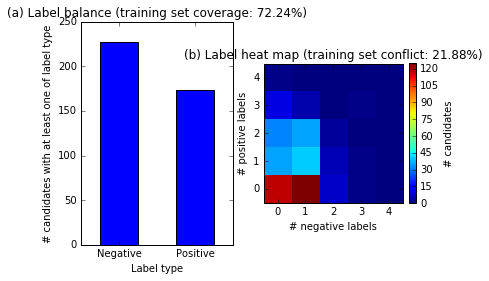

In [42]:
%matplotlib inline
DDL.plot_lf_stats()

In [43]:
DDL.top_conflict_lfs(n=3)

Labeling function,Percent candidates where LF has conflict
LF_pheno_only_one_word_f,21.18%
LF_mutation_gene_t,15.53%
LF_mutant_gene_t,15.53%


In [44]:
DDL.lowest_coverage_lfs(n=15)

Labeling function,Candidate coverage
LF_gene_ends_in_gfp_f,0.00%
LF_loss_of_gene_t,0.00%
LF_defect_of_gene_t,1.41%
LF_gene_pheno_words_in_common_f,1.65%
LF_pheno_before_gene_f,2.12%
LF_double_mutant_gene_t,2.82%
LF_mutation_gene_t,28.47%
LF_pheno_only_verb_f,3.06%
LF_mutation_pheno_t,3.29%
LF_mutant_gene_t,30.12%


In [45]:
DDL.lowest_empirical_accuracy_lfs(n=10)

100% accuracy and 0 generalization score are "perfect"


../ddlite.py:562: UserWarning: Dev sets are too small for reliable estimates
  warnings.warn("Dev sets are too small for reliable estimates")


Labeling function,Positive accuracy,Gen. score
LF_mutation_gene_t,0.00% (n=0),0.00 (n=0)
LF_mutant_gene_t,0.00% (n=0),0.00 (n=0)
LF_defect_of_gene_t,0.00% (n=0),0.00 (n=0)
LF_mutation_pheno_t,0.00% (n=0),0.00 (n=0)
LF_double_mutant_gene_t,0.00% (n=0),0.00 (n=0)
Labeling function,Negative accuracy,Gen. score
LF_pheno_before_gene_f,0.00% (n=0),0.00 (n=0)
LF_gene_pheno_words_in_common_f,0.00% (n=0),0.00 (n=0)
LF_pheno_only_verb_f,0.00% (n=0),0.00 (n=0)
LF_pheno_only_one_word_f,0.00% (n=0),0.00 (n=0)


In [46]:
#Let's have a look at the labeled elements:
# DDL.get_labeled_ground_truth(gt='resolve', subset=None)

In [47]:
print DDL.lf_matrix

  (0, 0)	1.0
  (0, 4)	-1.0
  (0, 8)	1.0
  (1, 0)	1.0
  (1, 4)	-1.0
  (1, 8)	1.0
  (2, 4)	-1.0
  (2, 8)	1.0
  (3, 8)	1.0
  (4, 8)	1.0
  (5, 0)	1.0
  (5, 4)	-1.0
  (5, 8)	1.0
  (6, 0)	1.0
  (6, 4)	-1.0
  (6, 8)	1.0
  (7, 0)	1.0
  (8, 0)	1.0
  (8, 4)	-1.0
  (11, 1)	1.0
  (11, 3)	-1.0
  (11, 4)	-1.0
  (13, 8)	1.0
  (17, 0)	1.0
  (17, 8)	1.0
  (19, 4)	-1.0
  (22, 4)	-1.0
  (25, 4)	-1.0
  (28, 4)	-1.0
  (29, 1)	1.0
  (29, 4)	-1.0
  (30, 0)	1.0
  (30, 8)	1.0
  (31, 0)	1.0
  (31, 1)	1.0
  (31, 8)	1.0
  (32, 0)	1.0
  (32, 8)	1.0
  (33, 0)	1.0
  (33, 4)	-1.0
  (33, 8)	1.0
  (34, 4)	-1.0
  (36, 4)	-1.0
  (39, 4)	-1.0
  (40, 4)	-1.0
  (41, 0)	1.0
  (41, 4)	-1.0
  (41, 8)	1.0
  (42, 0)	1.0
  (42, 8)	1.0
  (43, 0)	1.0
  (43, 4)	-1.0
  (43, 8)	1.0
  (44, 4)	-1.0
  (46, 4)	-1.0
  (47, 0)	1.0
  (47, 8)	1.0
  (48, 0)	1.0
  (48, 8)	1.0
  (49, 0)	1.0
  (49, 8)	1.0
  (50, 0)	1.0
  (50, 3)	-1.0
  (50, 4)	-1.0
  (50, 8)	1.0
  (51, 0)	1.0
  (51, 8)	1.0
  (52, 0)	1.0
  (52, 4)	-1.0
  (52, 8)	1.0
  (53, 0)	1.0


In [57]:
#Priting a specific candidate element from the DDL object
DDL.C[16]

<Relation: [u'ptst'][23] - [u'starch', u'granules'][25, 26]>
Words: <Relation: [u'ptst'][23] - [u'starch', u'granules'][25, 26]>
Lemmas: <Relation: [u'ptst'][23] - [u'starch', u'granules'][25, 26]>
POSES: <Relation: [u'ptst'][23] - [u'starch', u'granules'][25, 26]>

# Learning

We then learn the model from the previous training data and labeling functions.

In [49]:
matplotlib.rcParams['figure.figsize'] = (12,4)
#Try with bias=True, error currently for some reasons
%time DDL.learn_weights(sample=False, alpha=0.5, n_iter=500, bias=True, verbose=True, log=True, mu=1e-6)
# %time DDL.learn_weights(sample=False, alpha=0, bias=False, verbose=True, log=True)

../ddlite.py:566: UserWarning: Validation/test sets are too small for reliable estimates
  warnings.warn("Validation/test sets are too small for reliable estimates")


Begin training for mu = 1e-06
	Learning epoch = 0	Gradient mag. = 0.009772
	Learning epoch = 100	Gradient mag. = 0.010362
	Learning epoch = 200	Gradient mag. = 0.010390
	Learning epoch = 300	Gradient mag. = 0.010400
	Learning epoch = 400	Gradient mag. = 0.010404
Final gradient magnitude for mu=0.000: 0.010
CPU times: user 666 ms, sys: 26.3 ms, total: 692 ms
Wall time: 883 ms


<ddlite.ModelLog instance at 0x15888bd88>

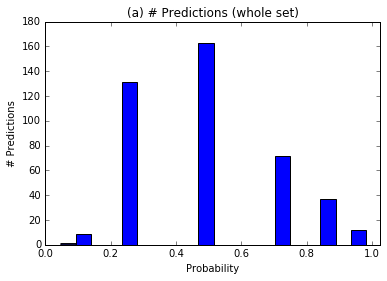

In [50]:
%matplotlib inline
DDL.plot_calibration()

In [51]:
DDL.lf_matrix

<425x11 sparse matrix of type '<type 'numpy.float64'>'
	with 531 stored elements in LInked List format>

# Iterating with labeling functions

In this part, we look in details at the results of the model learnt and iterate on it to improve the candidate extractors/training data/labeling functions

TODO: Currently, there is no function to observe in Mindtagger subset of the results (such as the candidates with expectation above 0.9 for instance). For that, a Mindbender instance can be set up and used for that.

In [52]:
DDL.show_log()

ID,# LFs,Test set size,Use LFs,Model,Precision,Recall,F1
0,11,0,True,Joint,0.000,0.000,0.000


In [53]:
# DDL.open_mindtagger(width='100%', height=1200)
DDL.open_mindtagger(num_sample=200, width='100%', height=1200)

Making sure MindTagger is installed. Hang on!


In [54]:
#ext_id are available from mindtag, we can write quick functions to extract:
#- all candidates in this sentence (from sent_id, match in R)
#- all label functions, from label matrix
R[1020].render()

IndexError: list index out of range

# Attempt with Multi Sentences

Here we concatenante 2 sentences in a same document, then export all the relations from this new dataset and keep only the candidates that have a "." between them.

WORK IN PROGRESS: not a priority currently. However, a multi sentence approach could be very interesting for the arabidopsis application where many relations are accross sentences.

In [ ]:
#Function to merge two dependencies path, just a prototype currently, many different possible
#In this function, the "." between the two sentences is placed as the root and the sentences are attached below
def merge_dependency_paths(dep_parent1, dep_parent2):
    res_dep_parents = dep_parent1+dep_parent2
    idx_root_sent1=-1
    for i in range(len(dep_parent1)):
        if dep_parent1[i]==0:
            idx_root_sent1=i
            break
    idx_root_sent2=-1
    for i in range(len(dep_parent2)):
        if dep_parent2[i]==0:
            idx_root_sent2=i
        res_dep_parents[len(dep_parent1)+i]=dep_parent2[i]+len(dep_parent1)
    #Setting the "." between the two sentences as the root
    res_dep_parents[len(dep_parent1)-1]=0
    #Connecting the two previous roots this new root
    res_dep_parents[idx_root_sent1]=len(dep_parent1)
    res_dep_parents[idx_root_sent2+len(dep_parent1)]=len(dep_parent1)
    return res_dep_parents


sents_multi = []
for idx in range(len(sents)-1):
    if sents[idx+1].doc_id == sents[idx].doc_id and sents[idx+1].sent_id == sents[idx].sent_id+1:
        parts = defaultdict(list)
        parts['words']=(sents[idx].words+sents[idx+1].words)
        parts['lemmas']=(sents[idx].lemmas+sents[idx+1].lemmas)
        parts['poses']=(sents[idx].poses+sents[idx+1].poses)
        parts['token_idxs']=(sents[idx].token_idxs+sents[idx+1].token_idxs)
        parts['dep_labels']=(sents[idx].dep_labels+sents[idx+1].dep_labels)
        parts['sent_id']=(sents[idx].sent_id)
        parts['doc_id']=(sents[idx].doc_id)
        parts['text']=(sents[idx].text+' '+ sents[idx+1].text)
        parts['dep_parents']=(merge_dependency_paths(sents[idx].dep_parents, sents[idx+1].dep_parents))
        res_sent = Sentence(**parts)
        sents_multi.append(res_sent)

In [ ]:
print sents[0].words + sents[1].words
print ' '
print sents_multi[0]

In [ ]:
R_multi = Relations(sents_multi, GM, PM)

In [ ]:
R_multi[10].render()
# R[0].render()

In [ ]:
#Filtering and removing 
R_multi.num_feats()

In [ ]:
DDL_multi = DDLiteModel(R_multi)
print "Extracted {} features for each of {} mentions".format(DDL_multi.num_feats(), DDL_multi.num_candidates())

In [ ]:
DDL.w

In [ ]:
# DDL.get_gt_dict()